# Classify MNIST with Keras and a Convolution-based Network

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline 



In [2]:
#Download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

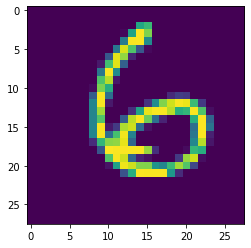

In [3]:
#Plot the first image in the dataset
plt.imshow(X_train[7456])


In [4]:
# Reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [6]:
#create model
model = Sequential()

In [7]:
# Create 64 convolutions with kerne size 3
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))

In [8]:
# Create 32 convolutions with kerne size 3
model.add(Conv2D(32, kernel_size=3, activation='relu'))

In [9]:
model.add(Flatten())

In [10]:
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [12]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1)

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.2510 - accuracy: 0.9503 - val_loss: 0.0738 - val_accuracy: 0.9772


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
scores=model.evaluate(X_test,y_test)
print("Baseline accuracy: {:.2f}".format(scores[1]*100))

10000/10000 [==============================] - 5s 537us/sample - loss: 0.0738 - accuracy: 0.9772
Baseline accuracy: 97.72


Expected number: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


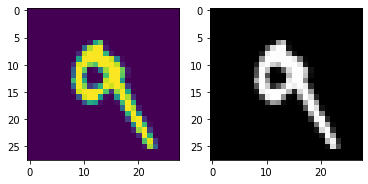

In [16]:
# Plot a image in the dataset (in color and grayscale)
index=0
plt.subplot(121)
plt.imshow(X_test[7])
plt.subplot(122)
plt.imshow(X_test[7],cmap=plt.get_cmap('gray'))
print("Expected number: {}".format(y_train[index]))

In [17]:
# The expected result does not match the predicted (probability)
import numpy as np
print("Expected: {}".format(y_test[7]))


x1 = np.expand_dims(X_test[7],axis=0)
preds = model.predict_classes(x1)
prob = model.predict(x1)
print(preds)
print(prob)

Expected: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[9]
[[2.0881254e-13 2.7796185e-09 9.8690884e-07 5.8515731e-08 1.5219280e-05
  6.3858330e-05 1.2679278e-10 4.5408541e-08 1.3169210e-06 9.9991846e-01]]
